<a href="https://colab.research.google.com/github/QColeman97/SA_Analytics/blob/main/gala24_sa_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Farm Gala 2024 Silent Auction Analytics

##What were the results from 2023? Let's Recap

In [ ]:
# @title
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Quinn Coleman/Gala 24 Analytics/'
# !ls /content/drive/MyDrive/Quinn\ Coleman/Gala\ 24\ Analytics

# These are columns that appear to have data
useful_columns = ['Name', 'Number', 'Category', 'FMV', 'Start', 'Raise']

gala23_item_df = pd.read_csv(file_path + 'Manage Items Farm Gala Admin Bolder Events Online Auction.csv')
gala23_item_df = gala23_item_df[gala23_item_df['Type'] == 'Silent']
gala23_item_df = gala23_item_df[useful_columns]
gala23_item_df['Category'] = gala23_item_df['Category'].apply(
    lambda row: row.replace('amp;', ''))
gala23_item_df.rename(columns={'Number': 'Item Number', 'Name': 'Item Name'}, inplace=True)
gala23_item_df.set_index('Item Number', inplace=True)

gala23_itemvol_df = pd.read_csv(file_path + 'Report Item Volume  Farm Gala Admin  Bolder Events Online Auction.csv')
gala23_itemvol_df.set_index('Item Number', inplace=True)

gala23_itemamt_df = pd.read_csv(file_path + 'Report Item Amount  Farm Gala Admin  Bolder Events Online Auction.csv')
gala23_itemamt_df.set_index('Item Number', inplace=True)
gala23_itemamt_df['Amount'] = gala23_itemamt_df['Amount'].apply(
    lambda row: row[1:].replace(',', '')).astype(float)

gala23_masteritem_df = gala23_item_df.join(gala23_itemvol_df.drop(columns=['Item Name']))
gala23_masteritem_df = gala23_masteritem_df.join(gala23_itemamt_df.drop(columns=['Item Name']))

gala23_masteritem_df['FMV:Amt'] = gala23_masteritem_df['FMV'] / gala23_masteritem_df['Amount']

# gala23_masteritem_df.head()

# These categories are not part of the silent auction
extraneous_cats23 = ['Paddle Raise', 'Heads or Tails', 'Wine Toss',
                     'Live Auction', 'Donation', 'Last Paddle', 'Tickets',
                     'FIRESALE']

gala23_cat_df = pd.read_csv(file_path + 'Report Category  Farm Gala Admin  Bolder Events Online Auction.csv')
gala23_cat_df.set_index('Category Name', inplace=True)
gala23_cat_df['Winning Bid Amount(s)'] = gala23_cat_df['Winning Bid Amount(s)'].apply(
    lambda row: row[1:].replace(',', '')).astype(float)
gala23_cat_df.drop(extraneous_cats23, inplace=True)

# Data Validations
assert gala23_itemvol_df['Bids'].sum() == gala23_cat_df['Total Bids'].sum()
assert gala23_itemamt_df['Amount'].sum() == gala23_cat_df['Winning Bid Amount(s)'].sum()

# Num items per category
gala23_cat_df = gala23_cat_df.join(gala23_item_df['Category'].value_counts().to_frame())
gala23_cat_df.rename(columns={'count': 'Item Count'}, inplace=True)

# Avg item's FMV per category
gala23_cat_df = gala23_cat_df.join(gala23_masteritem_df.groupby('Category')['FMV'].mean())
gala23_cat_df.rename(columns={'FMV': 'Average FMV'}, inplace=True)

# Avg item's # bids per category
gala23_cat_df = gala23_cat_df.join(gala23_masteritem_df.groupby('Category')['Bids'].mean())
gala23_cat_df.rename(columns={'Bids': 'Average Bids'}, inplace=True)

# Avg item's revenue per category
gala23_cat_df = gala23_cat_df.join(gala23_masteritem_df.groupby('Category')['Amount'].mean())
gala23_cat_df.rename(columns={'Amount': 'Average Amount'}, inplace=True)

gala23_cat_df

,Total Bids,Winning Bid Amount(s),Item Count,Average FMV,Average Bids,Average Amount
Category Name,,,,,,
Apparel,263,2408.0,27,101.333333,9.740741,89.185185
Home & Garden,164,2160.0,19,150.000000,8.631579,113.684211
Food & Beverage,159,1370.0,20,95.000000,7.950000,68.500000
Health & Wellness,121,2048.0,12,209.083333,10.083333,170.666667
Dining Out,97,557.0,7,59.285714,13.857143,79.571429
Entertainment,89,1844.0,8,344.125000,11.125000,230.500000
For the Kiddos,39,295.0,7,67.000000,5.571429,42.142857


<Axes: title={'center': '2023 Item Count'}>

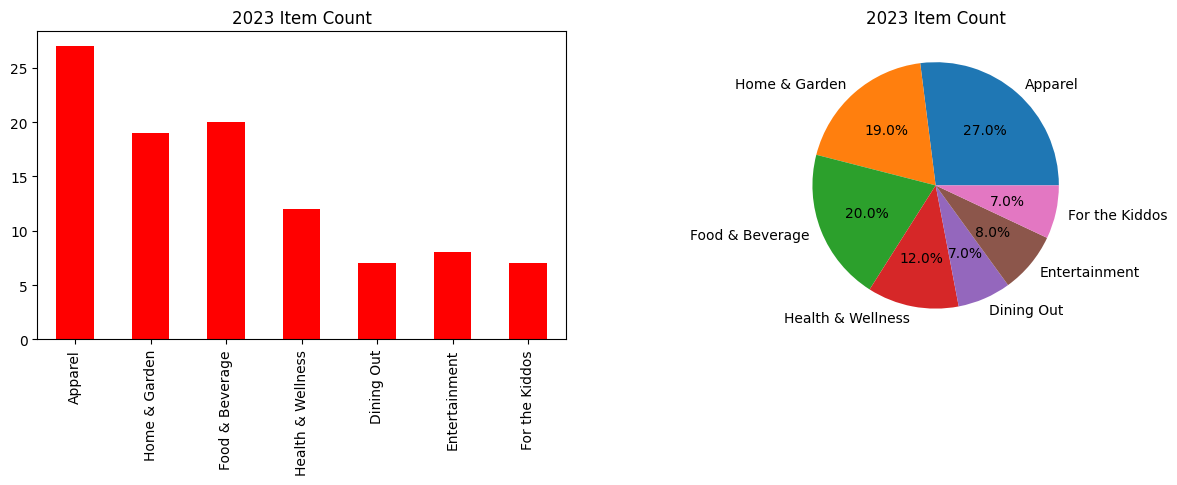

In [ ]:
# @title
fig, axes = plt.subplots(1, 2, figsize=(15,4))
gala23_cat_df['Item Count'].plot.bar(title='2023 Item Count', xlabel='', color='red', ax=axes[0])
gala23_cat_df['Item Count'].plot.pie(title='2023 Item Count', autopct='%1.1f%%', label='', ax=axes[1])

2023 Income Total: $10682.0
Correlation of Item Count to Total Winnings:  0.68
Correlation of Item Count to Total Bids:      0.95
Correlation of Average FMV to Total Winnings: 0.5
Correlation of Average FMV to Total Bids:    -0.14


<Axes: title={'center': '2023 Income'}>

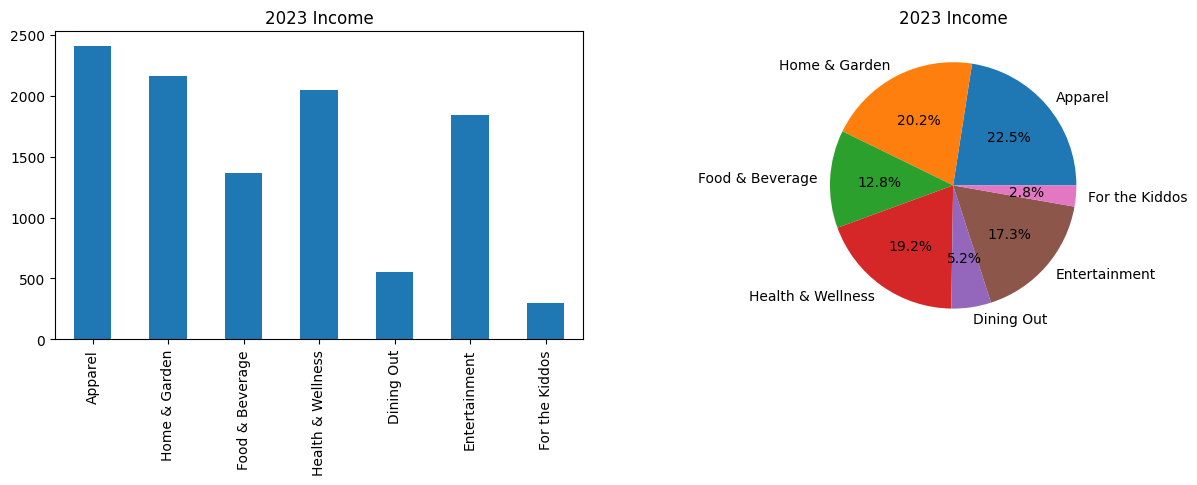

In [ ]:
# @title
print(f"2023 Income Total: ${gala23_cat_df['Winning Bid Amount(s)'].sum()}")
print(f"Correlation of Item Count to Total Winnings: {gala23_cat_df['Item Count'].corr(gala23_cat_df['Winning Bid Amount(s)']):{5}.{2}}")
print(f"Correlation of Item Count to Total Bids: {gala23_cat_df['Item Count'].corr(gala23_cat_df['Total Bids']):{9}.{2}}")
print(f"Correlation of Average FMV to Total Winnings: {gala23_cat_df['Average FMV'].corr(gala23_cat_df['Winning Bid Amount(s)']):.{2}}")
print(f"Correlation of Average FMV to Total Bids: {gala23_cat_df['Average FMV'].corr(gala23_cat_df['Total Bids']):{8}.{2}}")

fig, axes = plt.subplots(1, 2, figsize=(15,4))
gala23_cat_df['Winning Bid Amount(s)'].plot.bar(title='2023 Income', xlabel='', ax=axes[0])
gala23_cat_df['Winning Bid Amount(s)'].plot.pie(title='2023 Income', autopct='%1.1f%%', label='', ax=axes[1])

###2023 Income Total: **$10,682**

What we first notice, is item count is decently correlated to total income. Is there a reason that it isn't more correlated (the measure isn't closer to 1)? I notice the same for item average fair-market-value (FMV).

Since there isn't a clear correlation between FMV and income, it means we can't rely on assuming the lower an item's FMV the higher the income, or vice-versa. If we're lucky, we could find low FMV items that win bigger than their FMV.

The good: the highest winning categories of 2023 are Apparel, Home & Garden, Food & Beverage, Health & Wellness and Entertainment.

The bad: Dining Out and For the Kiddos brought in very low winnings.

Let's take a closer look at these categories' items.

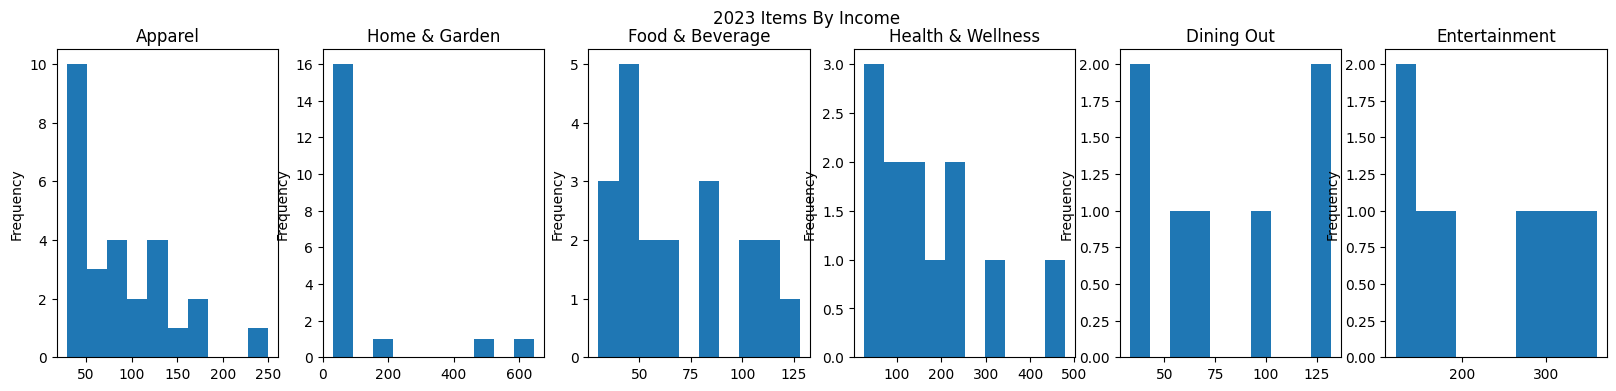

In [ ]:
# @title
highest_cats23 = gala23_cat_df.index.to_list()
highest_cats23.remove('For the Kiddos')

fig, axes = plt.subplots(1, len(highest_cats23), figsize=(20,4))
fig.suptitle('2023 Items By Income')
for ax, cat in zip(axes, highest_cats23):
    gala23_masteritem_df[gala23_masteritem_df['Category'] == cat]['Amount'].plot.hist(ax=ax)
    ax.set_title(cat)

###Let's look closer at each category

Let's look at Entertainment

In [ ]:
# @title

print('High Sellers:\n-', '\n- '.join(gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Entertainment') & (gala23_masteritem_df['Amount'] > 200)]['Item Name'].to_list()))
print('\nLow Sellers:\n-', '\n- '.join(gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Entertainment') & (gala23_masteritem_df['Amount'] < 200)]['Item Name'].to_list()))
# print('\nHigh Sell FMV:', gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Entertainment') & (gala23_masteritem_df['Amount'] > 200)]['FMV'].mean())
# print('Low Sell FMV:', gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Entertainment') & (gala23_masteritem_df['Amount'] < 200)]['FMV'].mean())
print(gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Entertainment') & (gala23_masteritem_df['Amount'] > 200)][['Item Name', 'FMV', 'Amount']])
print(gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Entertainment') & (gala23_masteritem_df['Amount'] < 200)][['Item Name', 'FMV', 'Amount']])

gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Entertainment') & (gala23_masteritem_df['FMV:Amt'] < 1)].sort_values(by='FMV:Amt')

High Sellers:
- "Core Essentials" Class with School of Natural Cookery
- 2 Tickets to the Colorado Symphony
- Half Day Guided Fishing Trip with Front Range Anglers
- Two 3-Day Passes to the 2024 Rocky Mountain Folks Festival and Dinner at Marigold

Low Sellers:
- 10 Film Tickets to Boulder International Film Festival
- Date Night with Studio Arts Boulder Pottery Lab
- Pottery Class with Wheelhouse Pottery
- Pottery Class with Wheelhouse Pottery
                                                     Item Name    FMV  Amount
Item Number                                                                  
1007         "Core Essentials" Class with School of Natural...  890.0   300.0
1005                        2 Tickets to the Colorado Symphony  220.0   268.0
1006         Half Day Guided Fishing Trip with Front Range ...  395.0   334.0
1001         Two 3-Day Passes to the 2024 Rocky Mountain Fo...  500.0   360.0
                                                     Item Name    FMV  Amount
Item 

,Item Name,Category,FMV,Start,Raise,Bids,Name,Amount,FMV:Amt
Item Number,,,,,,,,,
1002,Date Night with Studio Arts Boulder Pottery Lab,Entertainment,110.0,44.0,5.0,27,Andy & Guests(2) Bachmann,189.0,0.582011
1005,2 Tickets to the Colorado Symphony,Entertainment,220.0,88.0,9.0,13,Andy & Guests(2) Bachmann,268.0,0.820896


Half items \$100-\$200 & half \$300-400.

Looks like cooking classes, outdoor trips & state-wide entertainment win big, while more local entertainment and pottery classes bring in less. This lines up with item's fair-market-value.

Health & Wellness

In [ ]:
# @title
# e23_df = gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Health & Wellness')]
gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Health & Wellness')].sort_values(by='Amount') #.iloc[-2:]['Item Name'].to_list()
# e23_df.loc[e23_df['Amount'].idxmax()]['Item Name']
gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Health & Wellness') & (gala23_masteritem_df['FMV:Amt'] < 1)].sort_values(by='FMV:Amt')
gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Health & Wellness')].sort_values(by='Bids')

,Item Name,Category,FMV,Start,Raise,Bids,Name,Amount,FMV:Amt
Item Number,,,,,,,,,
900,1 initial consultation + treatment at Solstice...,Health & Wellness,185.0,74.0,15.0,1,Andy & Guests(2) Bachmann,74.0,2.500000
901,10 Pack for Yoga in the Park with Lauren Lewis,Health & Wellness,150.0,60.0,6.0,1,Meghan Conway & Ryan Jones,60.0,2.500000
904,2 Weeks of Unlimited Yoga at The Little Yoga S...,Health & Wellness,54.0,22.0,4.0,2,Mariah & Alex McPherson,26.0,2.076923
910,One 2 Hour Bike Fit with IOG Consultant Chris ...,Health & Wellness,500.0,200.0,20.0,3,Andy & Guests(2) Bachmann,220.0,2.272727
906,New Pair of Newton Running Shoes,Health & Wellness,250.0,100.0,10.0,7,Andy & Guests(2) Bachmann,180.0,1.388889
905,Skratch Labs Hydration Mix Variety Pack,Health & Wellness,88.0,35.0,5.0,7,Traci & Erik Thoresen,65.0,1.353846
908,Deluxe facial with Tiffany Sloan Skincare,Health & Wellness,125.0,50.0,5.0,11,Andy & Guests(2) Bachmann,100.0,1.250000
902,Gift Basket from Wish Garden Herbs,Health & Wellness,105.0,30.0,10.0,13,Andy & Guests(2) Bachmann,120.0,0.875000
909,Microcurrent Facial with Tiffany Sloan Skincare,Health & Wellness,150.0,60.0,6.0,16,Mary McCafferty & Jason Oeltjen,150.0,1.000000


Health & Wellness: all \$100-\$200, 1 outlier at ~\$300 and 1 > \$400.

It seems like the outlier was a game of golf. This item seems more related to entertainment than the rest of the items.The second, less significant, outlier item was a day-spa package. Other high winners seem to be a bike fitting, private classes and running shoes.

Yoga 10-pack and initial consult & treatment at Solstice - 1 bid.

Home & Garden

In [ ]:
# @title
# gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Home & Garden')].sort_values(by='Amount').iloc[-3:]['Item Name'].to_list()
gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Home & Garden')].sort_values(by='Amount')
gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Home & Garden') & (gala23_masteritem_df['FMV:Amt'] < 1)].sort_values(by='FMV:Amt')
gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Home & Garden')].sort_values(by='Bids')

,Item Name,Category,FMV,Start,Raise,Bids,Name,Amount,FMV:Amt
Item Number,,,,,,,,,
1207,I and Love and You Cat Set,Home & Garden,95.0,37.0,5.0,1,Traci & Erik Thoresen,37.0,2.567568
1200,Garden Veggie Kitchen Bundle with $20 Gift Cer...,Home & Garden,75.0,30.0,4.0,1,Traci & Erik Thoresen,30.0,2.500000
1208,"Acrylic Painting by Sarah Kinn - ""Sunset Light...",Home & Garden,400.0,160.0,16.0,2,Stewart Ward,176.0,2.272727
1218,"""Animals"" 4 Piece Pillow Case Set from Crooked...",Home & Garden,80.0,30.0,10.0,3,Catherine & Dennis Gates,50.0,1.600000
1201,Home Set from Jones & Co.,Home & Garden,166.0,66.0,7.0,3,Traci & Erik Thoresen,80.0,2.075000
1216,"Long's Gardens ""Cheetah's Choice"" Iris Basket",Home & Garden,75.0,40.0,8.0,3,Ben & Carrie Doyle,56.0,1.339286
1210,Gift Basket from Bliss,Home & Garden,59.0,23.0,4.0,3,Mariah & Alex McPherson,31.0,1.903226
1217,"Long's Gardens ""Five Favorites"" Iris Basket",Home & Garden,75.0,40.0,8.0,4,Julie Bixby & David Romblom,56.0,1.339286
1211,"Gift ""Pot"" from BBB Seet",Home & Garden,150.0,60.0,6.0,5,Andy & Guests(2) Bachmann,78.0,1.923077


Home & Garden: all low amts (< \$100), 1 outlier at ~\$200 and 2 extreme ones > \$400.

The majority seem to be home decor and tableware. It seems the outlier was a family portrait photo session. The fall cleanup & disposal won big, as well as the professional painting a little further behind.

The cat food and the garden veggie bundle got 1 bid.

Apparel

In [ ]:
# @title
a23_df = gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Apparel')]
print('The max outlier:', a23_df.loc[a23_df['Amount'].idxmax()])
print('\nThe lower third:\n', '\n- '.join(a23_df.sort_values(by='Amount').iloc[:9]['Item Name'].to_list()))
print('\nThe next two-thirds:\n', '\n- '.join(a23_df.sort_values(by='Amount').iloc[9:27]['Item Name'].to_list()))
# a23_df.sort_values(by='Amount').iloc[9:]
gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Apparel') & (gala23_masteritem_df['FMV:Amt'] < 1)].sort_values(by='FMV:Amt')
gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Apparel')].sort_values(by='Bids')

The max outlier: Item Name    Patagonia 55L Black Hole Duffel
Category                             Apparel
FMV                                    169.0
Start                                   68.0
Raise                                    7.0
Bids                                      27
Name               Andy & Guests(2) Bachmann
Amount                                 250.0
FMV:Amt                                0.676
Name: 803, dtype: object

The lower third:
 Wallaroo Hat (white/black)
- Maruca Design "Traveler Bag"
- Maruca Design "Cupcake" & "Roo Pouch" Bags
- POPPIES | 7 PANEL HAT | SEA | AQUA| WHITE 100% RECYCLED MESH
- Maruca Design "Busy Bee" Handbag
- EL SEGUNDO BLUE BUTTERFLY | TRUCKER HAT | BLUE TEAL | LUSH GREEN MESH
- Patagonia Men's '73 Skyline Organic T-Shirt
- WHORLED SUNFLOWERS | 7 PANEL HAT | LIME | CARIBBEAN BLUE | WHITE 100% RECYCLED MESH
- MOUNT RAINIER BLOOM | TRUCKER HAT | AQUA | CAMEL YELLOW

The next two-thirds:
 Maruca Design "Millie Lu" Handbag
- Patagonia Ul

,Item Name,Category,FMV,Start,Raise,Bids,Name,Amount,FMV:Amt
Item Number,,,,,,,,,
823,"Maruca Design ""Millie Lu"" Handbag",Apparel,92.0,40.0,5.0,1,Tricia and Kendall Nudelman,50.0,1.840000
826,"Maruca Design ""Cupcake"" & ""Roo Pouch"" Bags",Apparel,85.0,35.0,5.0,1,Bill Locke,35.0,2.428571
821,Earrings from Amy J. Metals,Apparel,258.0,79.0,10.0,1,Nancy Dilatush & Rob Knorr,79.0,3.265823
806,Wallaroo Hat (white/black),Apparel,55.0,24.0,5.0,2,Nancy Dilatush & Rob Knorr,29.0,1.896552
811,Deuter Scula school backpack,Apparel,150.0,60.0,6.0,3,Andy & Guests(2) Bachmann,72.0,2.083333
824,"Maruca Design ""Busy Bee"" Handbag",Apparel,59.0,25.0,4.0,4,Tom Boldt & Betsy Specht,37.0,1.594595
801,Patagonia Men's '73 Skyline Organic T-Shirt,Apparel,45.0,18.0,4.0,6,Darcy & Dan Mordhorst,38.0,1.184211
825,"Maruca Design ""Traveler Bag""",Apparel,50.0,20.0,3.0,6,Bill Locke,32.0,1.562500
804,$300 Gift Card to Bogs Footwear,Apparel,300.0,120.0,12.0,6,Bill Locke,180.0,1.666667


Apparel: a third < \$50 & 2-thirds \$50-\$200 & 1 outlier at $250.

The lowest third is hats and t-shirts, the next 2-thirds is bags/backpacks and gift cards to clothes/shoe shops. The outlier was a large Patagonia Duffle Bag. This outlier might show how big brand names shine.

The Deuter Pulse Fanny Pack was a surprising overvalue, sold for double its FMV.

The more fashionable items: Earrings & Maruca Design Bags got 1 bid.

Food & Beverage

In [ ]:
# @title
gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Food & Beverage') & (gala23_masteritem_df['FMV:Amt'] < 1)].sort_values(by='FMV:Amt')
gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Food & Beverage')].sort_values(by='Bids')

,Item Name,Category,FMV,Start,Raise,Bids,Name,Amount,FMV:Amt
Item Number,,,,,,,,,
713,Virtual Wine Tasting with Wines for Humanity f...,Food & Beverage,250.0,100.0,12.0,1,Nancy Dilatush & Rob Knorr,100.0,2.500000
704,Bobo's Oat Bars Gift Basket,Food & Beverage,150.0,50.0,5.0,2,Melissa & Chad Arnold,55.0,2.727273
712,Virtual Wine Tasting with Wines for Humanity f...,Food & Beverage,250.0,100.0,12.0,2,Toni Piaggio,112.0,2.232143
708,Organic India Gift Basket,Food & Beverage,100.0,32.0,5.0,3,Andy & Guests(2) Bachmann,37.0,2.702703
705,$25 Gift Card + Travel Mug to Ozo Coffee,Food & Beverage,50.0,18.0,4.0,4,Krishnan & Nisha Seshadri,30.0,1.666667
706,$25 Gift Card + Travel Mug to Ozo Coffee,Food & Beverage,50.0,18.0,4.0,4,Lauren Kelso,30.0,1.666667
702,Admit 4 to World of Belgian Beers Class,Food & Beverage,120.0,48.0,5.0,4,Matt Hopkin,63.0,1.904762
701,$30 Gift Certificate & Tea Sampler Gift Bag fr...,Food & Beverage,75.0,33.0,5.0,5,Andy & Guests(2) Bachmann,48.0,1.562500
711,Pastificio Pasta Sampler of 6 Pastas,Food & Beverage,48.0,23.0,5.0,5,Rebecca & Matthew Mabey,43.0,1.116279


Olive Oil and Chocolate were overvalued at about double their FMV.

The Virtual Wine Tasting only got 1 bid.

Dining Out

In [ ]:
# @title
gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Dining Out') & (gala23_masteritem_df['FMV:Amt'] < 1)].sort_values(by='FMV:Amt')
gala23_masteritem_df[(gala23_masteritem_df['Category'] == 'Dining Out')].sort_values(by='Bids')

,Item Name,Category,FMV,Start,Raise,Bids,Name,Amount,FMV:Amt
Item Number,,,,,,,,,
506,$25 Gift Card to Falafayette + An Awesome Hat!,Dining Out,55.0,25.0,4.0,8,Andy & Guests(2) Bachmann,41.0,1.341463
502,$40 Gift Card to Mountain Sun Pubs & Breweries,Dining Out,40.0,18.0,5.0,8,Andy & Guests(2) Bachmann,58.0,0.689655
504,$20 Gift Card to Moxie Bread Co.,Dining Out,20.0,12.0,3.0,9,Marcia Greenblatt & Bob Kovacs,33.0,0.606061
503,$50 Gift Card to Bramble & Hare,Dining Out,50.0,27.0,6.0,9,Arik & Jen Markus,63.0,0.793651
501,$100 Gift Card to Hapa Sushi,Dining Out,100.0,40.0,4.0,20,Kristin Lawrence,132.0,0.757576
500,$100 Gift Card to Motomaki,Dining Out,100.0,40.0,4.0,21,Kathleen & Mike Alt,132.0,0.757576
505,$50 Gift Card to Gemini,Dining Out,50.0,18.0,4.0,22,Tom Boldt & Betsy Specht,98.0,0.510204


Gemini (newer restaurant, opened in 2021) and Moxie both went for about double FMV

###Lets look at the data with outliers removed. Is there a trend?

In [ ]:
# @title
outlier_items = ['Family Photography Session with Rebecca Mabey', '4 Hour Fall Garden Clean Up & Disposal', 'Acrylic Painting by Sarah Kinn - "Sunset Light" (24" x 20")', 'Foursome at Lake Valley Golf Club', 'Two 60-minute Massages and Infrared Sauna with Symmetry 360 Massage', 'Patagonia 55L Black Hole Duffel']

gala23_masteritem_df_nooutliers = gala23_masteritem_df[~gala23_masteritem_df['Item Name'].isin(outlier_items)]
gala23_masteritem_df_nooutliers.groupby('Category')['Amount'].sum()
gala23_masteritem_df_nooutliers.groupby('Category')['Amount'].mean()

,Amount
Category,
Apparel,83.000000
Dining Out,79.571429
Entertainment,230.500000
Food & Beverage,68.500000
For the Kiddos,42.142857
Health & Wellness,123.900000
Home & Garden,53.625000


<Axes: title={'center': '2023 Income (No Outliers)'}>

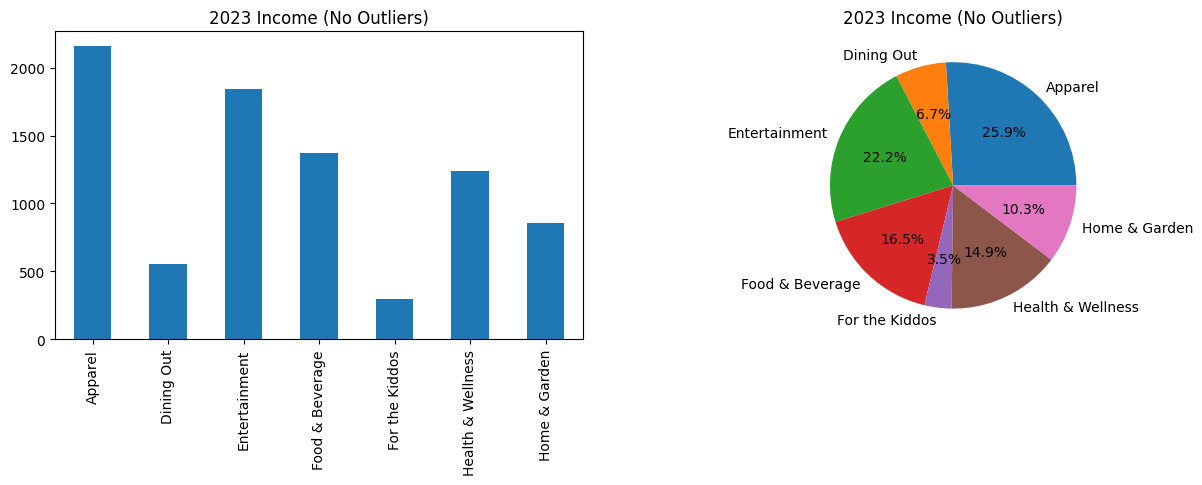

In [ ]:
# @title
fig, axes = plt.subplots(1, 2, figsize=(15,4))
gala23_masteritem_df_nooutliers.groupby('Category')['Amount'].sum().plot.bar(title='2023 Income (No Outliers)', xlabel='', ax=axes[0])
gala23_masteritem_df_nooutliers.groupby('Category')['Amount'].sum().plot.pie(title='2023 Income (No Outliers)', autopct='%1.1f%%', label='', ax=axes[1])

###In Conclusion For 2023
* Increase item counts for Entertainment (substantially) and Dining Out
  * Smallest item counts, but had the highest average bids per item, of all categories
* Decrease item count for Apparel
  * Average winnings per item is in the middle compared to other categories, and it has far more items than all other categories.
* For the Kiddos is insignificant

*Items to focus on either won big or sold noticably higher than FMV.
Items to avoid brought in 1 bid and sold for at most half of their FMV.*

**Apparel:**
Focus on outdoorsy items from big name-brands (eg. Patagonia) and that are trending such as fanny packs. Avoid commodity items like baseball caps and t-shirts.

**Entertainment:**
Focus on state-wide attractions like golf games, fishing trips and music festivals/concerts, more so than events in local area (Boulder, Longmont, etc.).

**Health & Wellness:**
Focus on skilled-practitioner recreational services like spa-days or bike-fitting/training. Avoid more "medically-focused" items such as the Solstice acupuncture treatment.

**Home & Garden:**
Focus on garden clean-up/maintenance services & unique decor like family portraits/original artwork. Avoid perishable items like the I and Love and You Cat Set.

**Food & Beverage:**
Focus on olive oil and chocolate. Avoid the virtual wine tasting.

**Dining Out:**
Focus on newly-opened restaurants and fooderies that sell at our farm stand. Ask for a lot of these items when increasing the items in this category, because they get overvalued compared to their low FMV.

##What were the results for 2024?

In [ ]:
# @title
gala24_item_df = pd.read_csv(file_path + 'Manage Items Farm Gala 2024 Admin Bolder Events Online Auction.csv')
gala24_item_df = gala24_item_df[gala24_item_df['Type'] == 'Silent']
gala24_item_df = gala24_item_df[useful_columns]
gala24_item_df['Category'] = gala24_item_df['Category'].apply(
    lambda row: row.replace('amp;', ''))
gala24_item_df.rename(columns={'Number': 'Item Number', 'Name': 'Item Name'}, inplace=True)
gala24_item_df.set_index('Item Number', inplace=True)

gala24_itemvol_df = pd.read_csv(file_path + 'Report Item Volume  Farm Gala 2024 Admin  Bolder Events Online Auction.csv')
gala24_itemvol_df.set_index('Item Number', inplace=True)

gala24_itemamt_df = pd.read_csv(file_path + 'Report Item Amount  Farm Gala 2024 Admin  Bolder Events Online Auction.csv')
gala24_itemamt_df.set_index('Item Number', inplace=True)
gala24_itemamt_df['Amount'] = gala24_itemamt_df['Amount'].apply(
    lambda row: row[1:].replace(',', '')).astype(float)

gala24_masteritem_df = gala24_item_df.join(gala24_itemvol_df.drop(columns=['Item Name']))
gala24_masteritem_df = gala24_masteritem_df.join(gala24_itemamt_df.drop(columns=['Item Name']))

gala24_masteritem_df['FMV:Amt'] = gala24_masteritem_df['FMV'] / gala24_masteritem_df['Amount']

gala24_masteritem_df.head()

# These categories are not part of the silent auction
extraneous_cats24 = ['Paddle Raise', 'Heads or Tails', 'Wine Toss',
                     'Live Auction', 'Donation', 'Last Paddle', 'Door Prize']

gala24_cat_df = pd.read_csv(file_path + 'Report Category  Farm Gala 2024 Admin  Bolder Events Online Auction.csv')
gala24_cat_df.set_index('Category Name', inplace=True)
gala24_cat_df['Winning Bid Amount(s)'] = gala24_cat_df['Winning Bid Amount(s)'].apply(
    lambda row: row[1:].replace(',', '')).astype(float)
gala24_cat_df.drop(extraneous_cats24, inplace=True)

# Data Validations
assert gala24_itemvol_df['Bids'].sum() == gala24_cat_df['Total Bids'].sum()
assert gala24_itemamt_df['Amount'].sum() == gala24_cat_df['Winning Bid Amount(s)'].sum()

# Num items per category
gala24_cat_df = gala24_cat_df.join(gala24_item_df['Category'].value_counts().to_frame())
gala24_cat_df.rename(columns={'count': 'Item Count'}, inplace=True)

# Avg item's FMV per category
gala24_cat_df = gala24_cat_df.join(gala24_masteritem_df.groupby('Category')['FMV'].mean())
gala24_cat_df.rename(columns={'FMV': 'Average FMV'}, inplace=True)

# Avg item's # bids per category
gala24_cat_df = gala24_cat_df.join(gala24_masteritem_df.groupby('Category')['Bids'].mean())
gala24_cat_df.rename(columns={'Bids': 'Average Bids'}, inplace=True)

# Avg item's revenue per category
gala24_cat_df = gala24_cat_df.join(gala24_masteritem_df.groupby('Category')['Amount'].mean())
gala24_cat_df.rename(columns={'Amount': 'Average Amount'}, inplace=True)

gala24_cat_df

,Total Bids,Winning Bid Amount(s),Item Count,Average FMV,Average Bids,Average Amount
Category Name,,,,,,
Food & Beverage,240,2581.0,20,118.050000,12.000000,129.050000
Entertainment,190,3599.0,20,177.900000,10.000000,189.421053
Dining Out,188,1623.0,14,74.642857,13.428571,115.928571
Apparel,137,2089.0,19,112.684211,7.210526,109.947368
Home & Garden,115,2652.0,18,258.722222,6.764706,156.000000
Health & Wellness,78,2060.0,14,163.142857,5.571429,147.142857
For the Kiddos,48,533.0,8,68.500000,6.000000,66.625000


<Axes: title={'center': '2023 to 2024 Item Count Change'}>

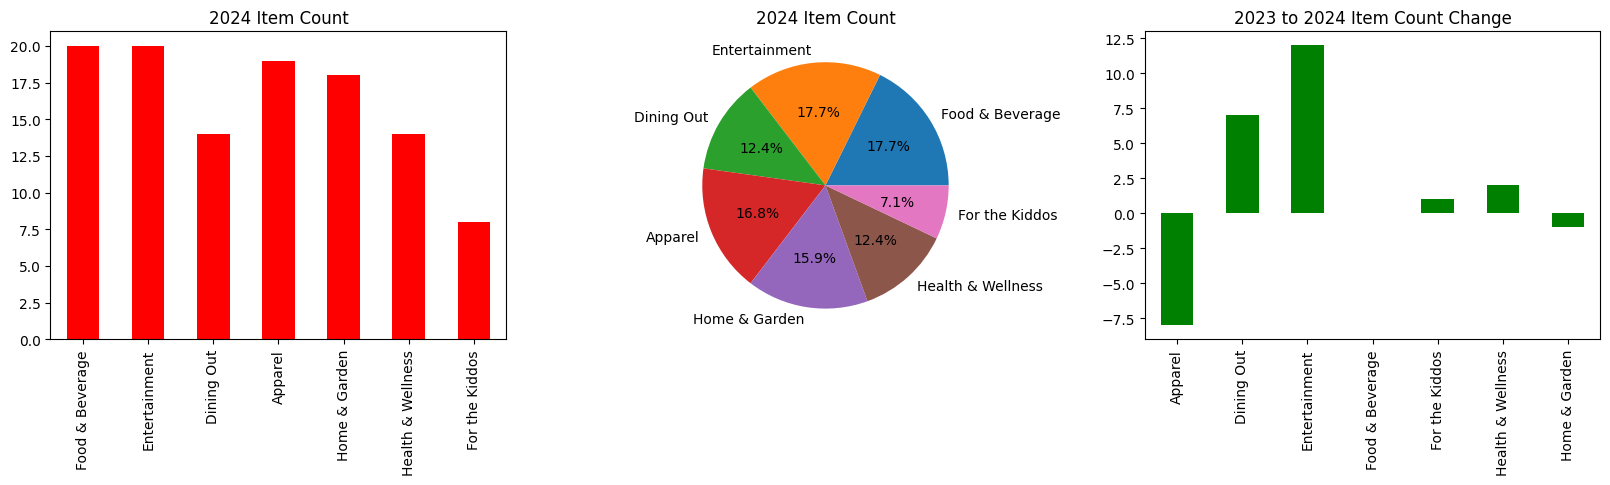

In [ ]:
# @title
fig, axes = plt.subplots(1, 3, figsize=(20,4))
gala24_cat_df['Item Count'].plot.bar(title='2024 Item Count', xlabel='', color='red', ax=axes[0])
gala24_cat_df['Item Count'].plot.pie(title='2024 Item Count', autopct='%1.1f%%', label='', ax=axes[1])
(gala24_cat_df['Item Count'] - gala23_cat_df['Item Count']).plot.bar(title='2023 to 2024 Item Count Change', xlabel='', color='green', ax=axes[2])

2024 Income Total:                $15137.0
2023 to 2024 Income Total Change: $4455.0
Correlation of Item Count to Total Winnings:  0.89
Correlation of Item Count to Total Bids:      0.72
Correlation of Average FMV to Total Winnings: 0.67
Correlation of Average FMV to Total Bids:   -0.043


<Axes: title={'center': '2023 to 2024 Income Change'}>

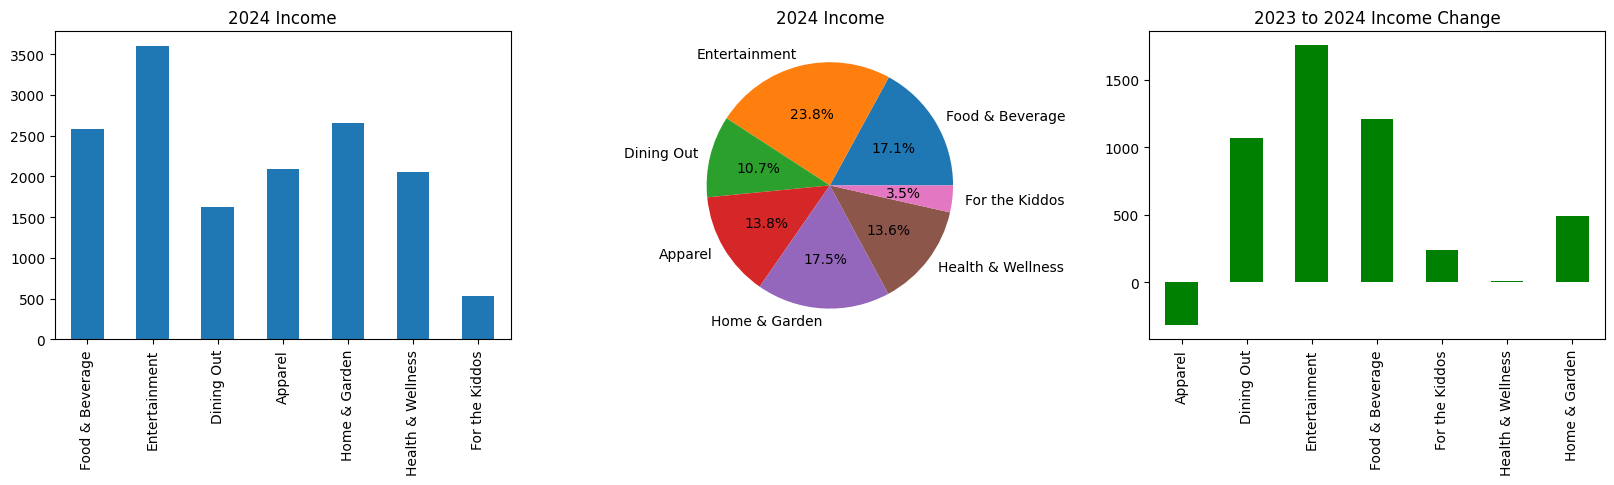

In [ ]:
# @title
print(f"2024 Income Total:                ${gala24_cat_df['Winning Bid Amount(s)'].sum()}")
print(f"2023 to 2024 Income Total Change: ${gala24_cat_df['Winning Bid Amount(s)'].sum() - gala23_cat_df['Winning Bid Amount(s)'].sum()}")
print(f"Correlation of Item Count to Total Winnings: {gala24_cat_df['Item Count'].corr(gala24_cat_df['Winning Bid Amount(s)']):{5}.{2}}")
print(f"Correlation of Item Count to Total Bids: {gala24_cat_df['Item Count'].corr(gala24_cat_df['Total Bids']):{9}.{2}}")
print(f"Correlation of Average FMV to Total Winnings: {gala24_cat_df['Average FMV'].corr(gala24_cat_df['Winning Bid Amount(s)']):.{2}}")
print(f"Correlation of Average FMV to Total Bids: {gala24_cat_df['Average FMV'].corr(gala24_cat_df['Total Bids']):{8}.{2}}")

fig, axes = plt.subplots(1, 3, figsize=(20,4))
gala24_cat_df['Winning Bid Amount(s)'].plot.bar(title='2024 Income', xlabel='', ax=axes[0])
gala24_cat_df['Winning Bid Amount(s)'].plot.pie(title='2024 Income', autopct='%1.1f%%', label='', ax=axes[1])
(gala24_cat_df['Winning Bid Amount(s)'] - gala23_cat_df['Winning Bid Amount(s)']).plot.bar(title='2023 to 2024 Income Change', xlabel='', color='green', ax=axes[2])

###2023 Income Total: **\$10,682**, and 2024 Income Total: **\$15,137**. We brought in $4,455 more than last year!

More so than last year, item count was highly correlated to total income! Why could this be?

It seems that we had similar insights from 2023, as we added more items to Entertainment & Dining Out categories, and took away from Apparel.

The good: Entertainment, Dining Out and Food & Beverage all had substantial income gains. Overall each category, except For the Kiddos, has brought in substantial income - similar to the best categories of 2023.

The bad: The Apparel category brought in less income than last year. For the Kiddos still brings low income.

Let's see what items make up our categories:

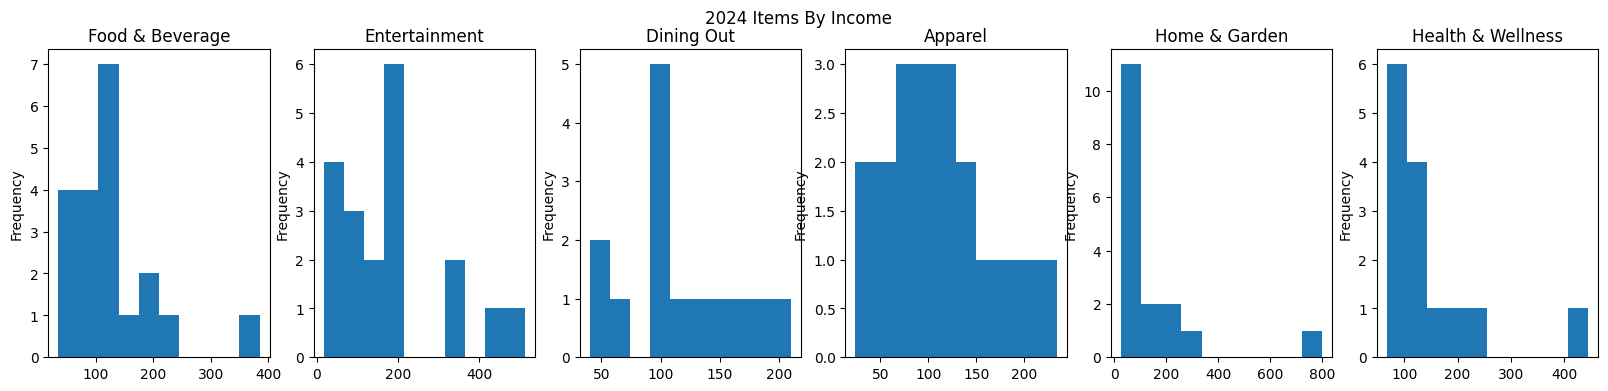

In [ ]:
# @title
highest_cats24 = gala24_cat_df.index.to_list()
highest_cats24.remove('For the Kiddos')

fig, axes = plt.subplots(1, len(highest_cats24), figsize=(20,4))
fig.suptitle('2024 Items By Income')
for ax, cat in zip(axes, highest_cats24):
    gala24_masteritem_df[gala24_masteritem_df['Category'] == cat]['Amount'].plot.hist(ax=ax)
    ax.set_title(cat)

###Let's look closer at each category

Food & Beverage

In [ ]:
# @title
gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Food & Beverage')].sort_values(by='Amount').iloc[-5:]
gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Food & Beverage') & (gala24_masteritem_df['FMV:Amt'] < 1)].sort_values(by='FMV:Amt')
gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Food & Beverage')].sort_values(by='Bids')

,Item Name,Category,FMV,Start,Raise,Bids,Name,Amount,FMV:Amt
Item Number,,,,,,,,,
705,Virtual Wine Tasting with Wines for Humanity f...,Food & Beverage,250,113.0,14.0,1.0,John & Jaye Zola,113.0,2.212389
707,$25 Gift Card to Ozo Coffee & Tumbler,Food & Beverage,58,32.0,5.0,4.0,Andy Bachmann,57.0,1.017544
713,"Mug, Coffee, & $25 Gift Card from Bitty & Beau...",Food & Beverage,57,25.0,3.0,7.0,Win & DiAnne Franklin,43.0,1.325581
708,Bobo's Oat Bars Gift Basket,Food & Beverage,225,101.0,12.0,8.0,Andy Bachmann,221.0,1.018100
720,Growing Gardens' Board Wine Cellar,Food & Beverage,545,245.0,20.0,8.0,Marcia Greenblatt & Bob Kovacs,385.0,1.415584
704,Admit 4 to World of Belgian Beers Class,Food & Beverage,140,63.0,6.0,9.0,Darcy & Dan Mordhorst,117.0,1.196581
702,6 Month Coffee Subsription to Conscious Coffee,Food & Beverage,120,54.0,5.0,10.0,Natalie & Kurt Baumgartner,99.0,1.212121
700,Gift Basket from Purely Elizabeth,Food & Beverage,75,38.0,5.0,10.0,Andy Bachmann,118.0,0.635593
717,Case of Scarpetta Pino Grigio Wine,Food & Beverage,180,80.0,8.0,11.0,Rachel Flax Kaplan,152.0,1.184211


Food & Beverage: Items won ~\$50-\$250. One outlier at ~\$375.

It seems as though the 'wine cellar' won by a landslide. Judging by the name, this seems to be a special item and should definitely be focused on.

I also see more olive oil, a valuable item, and still winning big at twice it's FMV.

The Virtual Wine Tasting still struggles with only 1 bid.



Entertainment

In [ ]:
# @title
gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Entertainment')].sort_values(by='Amount')#.iloc[-11:]
gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Entertainment')].sort_values(by='Amount').iloc[-5:-1]['Item Name'].to_list()
gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Entertainment') & (gala24_masteritem_df['FMV:Amt'] < 1)].sort_values(by='FMV:Amt')
gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Entertainment')].sort_values(by='Bids')

,Item Name,Category,FMV,Start,Raise,Bids,Name,Amount,FMV:Amt
Item Number,,,,,,,,,
1010,Family 4 Pack to a Rocky Mountain Vibes Baseba...,Entertainment,40,18.0,5.0,1.0,Mary McCafferty & Jason Oeltjen,18.0,2.222222
1008,2 Tickets to 'Mo Lowda & The Humble' concert a...,Entertainment,46,20.0,5.0,2.0,Sarah Kell,25.0,1.840000
1009,2 Tickets to a 'Valley' Concert at the Boulder...,Entertainment,70,32.0,4.0,3.0,Jordan & Angie Bailey,40.0,1.750000
1011,2 Night Stay at the A-Lodge + Breakfast at Moxie,Entertainment,340,150.0,10.0,4.0,Andy Bachmann,450.0,0.755556
1018,2 Tickets to See the Colorado Symphony,Entertainment,220,95.0,10.0,5.0,Andy Bachmann,205.0,1.073171
1001,Two Tickets to See the Boulder Ballet,Entertainment,100,45.0,5.0,6.0,Andy Bachmann,90.0,1.111111
1003,1/2 Day Guided Fishing Trip with Front Range A...,Entertainment,295,133.0,16.0,7.0,Andy Bachmann,357.0,0.826331
1000,Two 3-Day Tickets to '25 Rocky Mountain Folks ...,Entertainment,420,189.0,19.0,7.0,Bill Locke & Charles Abbott,322.0,1.304348
1014,One Nights Stay at The Art Hotel Denver,Entertainment,199,90.0,9.0,8.0,Andy Bachmann,207.0,0.961353


Entertainment: Items won up ~\$10-\$200. We have 4 outliers around \$400.

The 2 biggest winner outliers were a golf game & a special hotel & breakfast "getaway package", followed closely by a fishing trip and music festival.

I see 2 attractions at Growing Gardens, which won almost double their FMV. A romantic attraction, Date Night at Groundworks, also won double it's FMV.

The 4-ticket pack to the "Rocky Mountain Vibes" baseball game struggled with only 1 bid.

Dining Out

In [ ]:
# @title
gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Dining Out')].sort_values(by='Amount')
# gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Dining Out') & (gala24_masteritem_df['FMV:Amt'] < 1)].sort_values(by='FMV:Amt')
gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Dining Out')].sort_values(by='Bids').iloc[0]['Item Name']

'"Mega-Rita" Glass from My Neighbor Felix + Drink Tokens'

Dining Out: Items won about \$50-\$200.

It seems like lower FMV items win up to double their FMV, more so than higher FMV items.

The "Mega-Rita" Glass and Drink Tokens Pack struggled with only 1 bid.

Apparel

In [ ]:
# @title
gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Apparel')].sort_values(by='Amount')
# gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Apparel') & (gala24_masteritem_df['FMV:Amt'] < 1)].sort_values(by='FMV:Amt')
# gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Apparel')].sort_values(by='Bids').iloc[1]['Item Name']

,Item Name,Category,FMV,Start,Raise,Bids,Name,Amount,FMV:Amt
Item Number,,,,,,,,,
806,Maruca Design Accessory Bag,Apparel,35,24.0,5.0,1.0,Andy Bachmann,24.0,1.458333
807,Ponytail Hat' by Wallaroo Hat Company,Apparel,53,27.0,5.0,4.0,Margot Smit,42.0,1.261905
818,Bracelet Set from BuDha Girl,Apparel,100,45.0,5.0,2.0,Grace Matelich & Laura Orland,50.0,2.000000
813,$50 Gift Card to Rags Consignment,Apparel,50,27.0,5.0,7.0,Melissa & Chad Arnold,62.0,0.806452
816,Ann Crossbody made by K Carroll Accessories,Apparel,60,25.0,4.0,6.0,Andy Bachmann,81.0,0.740741
809,Deuter AC Lite 23 Hiking Backpack,Apparel,110,50.0,7.0,7.0,Nancy & Lawrence Wojcik,85.0,1.294118
817,Cleo Slouchy Quilted Tote Bag made by Street L...,Apparel,80,35.0,5.0,5.0,Andy Bachmann,85.0,0.941176
808,Sausalito Hat' by Wallaroo Hat Company,Apparel,67,38.0,5.0,12.0,Melissa & Chad Arnold,88.0,0.761364
801,Patagonia Refugio Daypack 26L Backpack,Apparel,109,49.0,5.0,9.0,Nancy & Lawrence Wojcik,89.0,1.224719


Apparel: Items won ~\$25-$250.

It seems that the Maruca Design Small Crossbody Bag was overvalued at 3x its FMV. It has a relatively low FMV at \$54, compared to other Maruca Design bags.

The $35 Gift Card to My Saving Grace & Snakeskin Wallet struggled with only 1 bid. Would this possibly turn off earth-conscious participants?

Home & Garden

In [ ]:
# @title
gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Home & Garden')].sort_values(by='Amount').iloc[9:]
# gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Home & Garden')].sort_values(by='Amount').iloc[-2]['Item Name']
gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Home & Garden') & (gala24_masteritem_df['FMV:Amt'] < 1)].sort_values(by='FMV:Amt')
gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Home & Garden')].sort_values(by='Bids')

,Item Name,Category,FMV,Start,Raise,Bids,Name,Amount,FMV:Amt
Item Number,,,,,,,,,
1202,Raindrip Automatic Watering Kit,Home & Garden,60,27.0,5.0,1.0,Courtney & Brian Pramann,27.0,2.222222
1205,Framed Painting of Community Gardens by Mardie...,Home & Garden,225,100.0,10.0,1.0,Andrew Mikus,100.0,2.250000
1214,Baby Quilt by Annie Hudnut,Home & Garden,500,225.0,20.0,1.0,Natalie & Kurt Baumgartner,225.0,2.222222
1210,Gold Set - Handblown Glass Pumpkins,Home & Garden,150,68.0,7.0,3.0,Andy Bachmann,103.0,1.456311
1211,Blue/Green Set - Handblown Glass Pumpkins,Home & Garden,150,68.0,7.0,3.0,Andy Bachmann,110.0,1.363636
1200,Handmade Dish Soap Set & Tangerine Hand Soap f...,Home & Garden,39,19.0,5.0,4.0,Nancy Dilatush,34.0,1.147059
1201,$25 Gift Card & Kitchen Accessories from Singi...,Home & Garden,100,45.0,5.0,5.0,Andy Bachmann,95.0,1.052632
1206,Margaret Johnson Framed Monotype,Home & Garden,300,225.0,20.0,5.0,Michael & Jay Montgomery,325.0,0.923077
1203,BBB Seed Gift Basket,Home & Garden,150,68.0,7.0,5.0,Andrew Mikus,96.0,1.562500


Home & Garden: Half items won ~\$50 & half ~\$100-\$300. One outlier
 at ~\$800.

Once again, the family portait photography wins by the most, followed by original art/craft work. I don't see garden cleaning/maintenance service.

Of the first half of items: dishware, flowers, gift cards
Of the second half: paintings and decor

The gift card at a flower shop was overvalued at double its FMV.

It seems the automatic watering kit struggled with only 1 bid. It is one of the few gardening tools up for auction.

Health & Wellness

In [ ]:
# @title
gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Health & Wellness')].sort_values(by='Amount').iloc[7:]
gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Health & Wellness') & (gala24_masteritem_df['FMV:Amt'] < 1)].sort_values(by='FMV:Amt')
gala24_masteritem_df[(gala24_masteritem_df['Category'] == 'Health & Wellness')].sort_values(by='Bids')

,Item Name,Category,FMV,Start,Raise,Bids,Name,Amount,FMV:Amt
Item Number,,,,,,,,,
900,$200 to Solstice Health,Health & Wellness,200,90.0,12.0,3.0,Andy Bachmann,138.0,1.449275
906,Adaptogenic Drink Mixes from Rasa,Health & Wellness,144,65.0,6.0,3.0,Liz Hannon & Jon Todd,77.0,1.870130
912,Gift Box from Four Sigmatic,Health & Wellness,130,60.0,6.0,3.0,Andy Bachmann,90.0,1.444444
909,One Month of Unlimited Yoga at Yoga Pod Studio,Health & Wellness,175,75.0,5.0,3.0,Andy Bachmann,185.0,0.945946
905,5 Entries to Longmont Climbing Collective,Health & Wellness,115,52.0,5.0,4.0,Jocelyn Corkin & Peter Mortimer,67.0,1.716418
904,Unlimited Yoga for a Month at The Little Yoga ...,Health & Wellness,120,54.0,5.0,4.0,Andy Bachmann,89.0,1.348315
907,Consultation and Treatment at Acupuncture Clin...,Health & Wellness,139,63.0,6.0,5.0,Andy Bachmann,111.0,1.252252
910,Foursome at Lake Valley Golf Course,Health & Wellness,500,225.0,22.0,5.0,Andy Bachmann,445.0,1.123596
911,One Month Membership to Corepower Yoga,Health & Wellness,100,45.0,5.0,6.0,Andy Bachmann,135.0,0.740741


Health & Wellness: Half items won ~\$50 & half ~\$100-\$150. One outlier at ~\$400.

Again, the golf game wins by a landslide, which is more related to entertainment and goes to show entertainment value compared to Healh & Wellness. Close behind we see a day-spa trip like last year, although no shoe/bike-fitting.

Of the first half of items: healthy drinks, yoga/massage/acupunture
The second half of items: month-long yoga membership, gift cards

Seemingly, gift cards get overvalued at almost double their FMV.

###Lets look at the 2024 data with outliers removed. Is there a trend?

In [ ]:
# @title
outlier_items24 = [
  'Foursome at Lake Valley Golf Course',
  'A Boutique Portrait Photography Session with Rebecca Mabey Photography',
  "Two 3-Day Tickets to '25 Rocky Mountain Folks Festival",
  '1/2 Day Guided Fishing Trip with Front Range Anglers for 2',
  '2 Night Stay at the A-Lodge + Breakfast at Moxie',
  'Foursome at Boulder Country Club',
  "Growing Gardens' Board Wine Cellar"]

gala24_masteritem_df_nooutliers = gala24_masteritem_df[~gala24_masteritem_df['Item Name'].isin(outlier_items24)]
gala24_masteritem_df_nooutliers.groupby('Category')['Amount'].sum()
gala24_masteritem_df_nooutliers.groupby('Category')['Amount'].mean()

,Amount
Category,
Apparel,109.947368
Dining Out,115.928571
Entertainment,130.466667
Food & Beverage,115.578947
For the Kiddos,66.625000
Health & Wellness,124.230769
Home & Garden,115.750000


<Axes: title={'center': '2024 Income (No Outliers)'}>

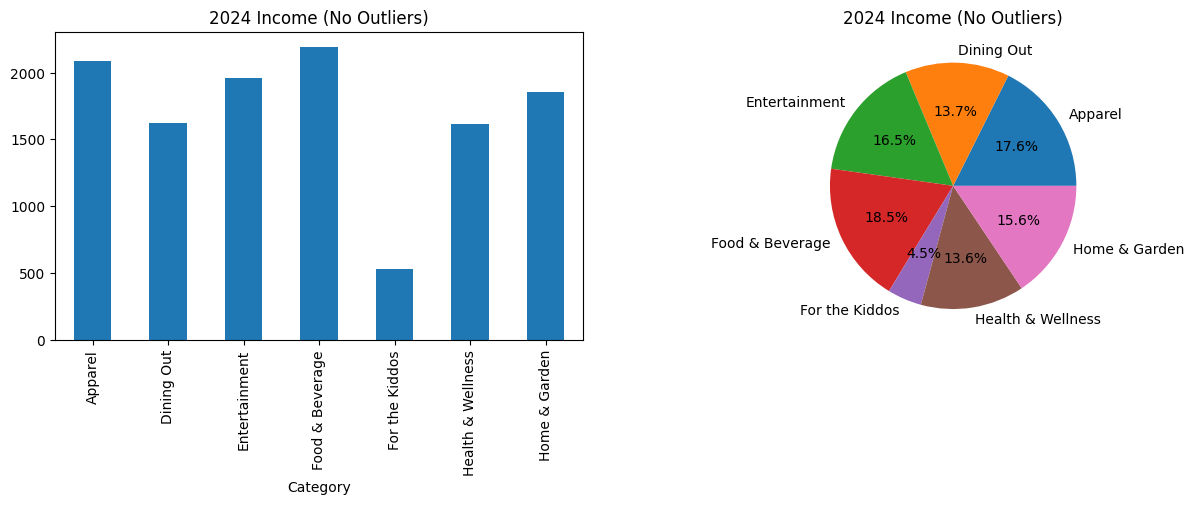

In [ ]:
# @title
fig, axes = plt.subplots(1, 2, figsize=(15,4))
gala24_masteritem_df[~gala24_masteritem_df['Item Name'].isin(outlier_items24)].groupby('Category')['Amount'].sum().plot.bar(title='2024 Income (No Outliers)', ax=axes[0])
gala24_masteritem_df[~gala24_masteritem_df['Item Name'].isin(outlier_items24)].groupby('Category')['Amount'].sum().plot.pie(title='2024 Income (No Outliers)', autopct='%1.1f%%', label='', ax=axes[1])

###In Conclusion For 2023 & 2024
* Increase item counts further for Dining Out
  * Still a smaller item count, but had the highest average bids per item, of all categories
* Decrease item count further for Apparel
  * Average winnings per item is lower compared to most other categories, and still of the categories with the most items
* For the Kiddos is still insignificant

*Items to focus on either won big or sold noticably higher than FMV.
Items to avoid brought in 1 bid and sold for at most half of their FMV.*

**Apparel:** Outdoorsy items continue to work that are from big name-brands (eg. Patagonia) - continue focusing on these. To reduce item count, we shouldn't supply commody items like "Ponytail Hat". Also the snakeskin wallet did not work, so I assume participants lean towards earth-friendly materials and sourcing.

**Food & Beverage:** We included more olive oil which worked great, and next year we should increase another overvalued item: chocolate. Like last year, the Board Member Wine Cellar won huge, so we should focus on similar specialty items. Both years show we should avoid the virtual wine tasting.

**Entertainment:** Increasing item count worked! State-wide and outdoorsy attractions (eg. golf games, all-inclusive "getaway packages", music festivals and fishing trips) continue to dominate local events. Another alternative that works is tickets to events at Growing Gardens, and possibly romantic/couples activities.

**Home & Garden:** The family portrait photography session continues to win huge, so let's keep focused on personalized artwork. We missed an opportunity with no garden cleaning/maintenance service. Avoid assistive tools like the automatic watering kit, possibly because gardeners like reliability of service over a tool that could be a gimmick.

**Dining Out:** Increasing item count worked! To increase count further, focus on asking for more items in the lower FMV's (~\$50) - novelty seems more important than quality (newly opened restaurants and vendors at our farm stands).

**Health & Wellness:** Recreational services by trained practitioners continue working well (spa day packages, bike fittings, etc.). We missed winnings this year by not including a bike fit, because possibly services that support outdoor recreation win the biggest (ski-boot fittings, trainers, etc.).